# Performing Linear Regression on Car Dataset 

### Stage1 - Importing the data as is , and try to get the summary of the data , and gain insights on the loaded data 

#### Importing necessary libraries to read the CSV dataset .

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read CSV and load in dataframe .

In [31]:
dataframe1 = pd.read_csv("car_details_1.csv")
dataframe1 = dataframe1.fillna(0)
dataframe2 = pd.read_csv("car_details_2.csv")
dataframe2 = dataframe2.fillna(0)

#### Head of the data , to get overall information on the dataframe .

In [32]:
dataframe1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [33]:
dataframe2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [34]:
dataframe1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [35]:
dataframe2.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.269439
std,4.044249,8.062534e+05,5.655055e+04,1.293039
min,1983.000000,2.999900e+04,1.000000e+00,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


#### Correlation between Data in both the dataframe

In [36]:
dataframe1.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


Seems that the year of the make of model has a strong correlation with the selling price of the car .
Most of all , it also states that the older cars tended to be cheaper than newer cars , due to various other factors contributing to increase in price .

In [37]:
dataframe2.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,0.173232
selling_price,0.414092,1.000000,-0.225534,0.088110
km_driven,-0.418006,-0.225534,1.000000,0.119630
seats,0.173232,0.088110,0.119630,1.000000


### Stage 2 - Preprocessing Data and developing more insights on the loaded data 

Types of Owner of car in both the DataFrame .


Dataframe1 :

In [38]:
print('Types of Owner in DataFrame1 : \n')

for x in list(dataframe1['owner'].unique()):
    print(x)
    
print('\n\nTypes of Fuel : \n')

for x in list(dataframe1['fuel'].unique()):
    print(x)
    
print('\n\nTypes of Seller Type : \n')

for x in list(dataframe1['seller_type'].unique()):
    print(x)
    
print('\n\nTypes of Transmission Type : \n')

for x in list(dataframe1['transmission'].unique()):
    print(x)

Types of Owner in DataFrame1 : 

First Owner
Second Owner
Fourth & Above Owner
Third Owner
Test Drive Car


Types of Fuel : 

Petrol
Diesel
CNG
LPG
Electric


Types of Seller Type : 

Individual
Dealer
Trustmark Dealer


Types of Transmission Type : 

Manual
Automatic


In [39]:
print('Types of Owner in DataFrame2 : \n')

for x in list(dataframe2['owner'].unique()):
    print(x)
    
print('\n\nTypes of Fuel : \n')

for x in list(dataframe2['fuel'].unique()):
    print(x)
    
print('\n\nTypes of Seller Type : \n')

for x in list(dataframe2['seller_type'].unique()):
    print(x)
    
print('\n\nTypes of Transmission Type : \n')

for x in list(dataframe2['transmission'].unique()):
    print(x)

Types of Owner in DataFrame2 : 

First Owner
Second Owner
Third Owner
Fourth & Above Owner
Test Drive Car


Types of Fuel : 

Diesel
Petrol
LPG
CNG


Types of Seller Type : 

Individual
Dealer
Trustmark Dealer


Types of Transmission Type : 

Manual
Automatic


Both the dataframe contains same set of values for the owner column , which means , the car can be classified in 5 kinds , based on owner of the car .

Number of records present in Dataframe1 and Dataframe2

In [40]:
print('DataFrame1 contains '+str(dataframe1['name'].count())+' records and DataFrame2 contains '+str(dataframe2['name'].count()))

DataFrame1 contains 4340 records and DataFrame2 contains 8128


Note :: No joins should be performed on the two dataframes , as these are individual records without any dependency or foreign Key References .

#### Providing new Integer Codes for Fuel of the Car .
    Diesel = 1
    Petrol = 2
    LPG = 3
    CNG = 4

In [41]:
dataframe1['fuel']=dataframe1['fuel'].map(lambda x: 1 if x=='Diesel' else(2 if x=='Petrol' else(3 if x=='LPG' else 4)))
dataframe2['fuel']=dataframe2['fuel'].map(lambda x: 1 if x=='Diesel' else(2 if x=='Petrol' else(3 if x=='LPG' else 4)))

#### Providing new Integer Codes for Transmission of the Car .
    Manual = 1
    Automatic = 2

In [42]:
dataframe1['transmission']=dataframe1['transmission'].map(lambda x: 1 if x=='Manual' else 2)
dataframe2['transmission']=dataframe2['transmission'].map(lambda x: 1 if x=='Manual' else 2)

#### Providing new Integer Codes for Seller Types of the Car .
    Individual = 1
    Dealer = 2
    Trustmark Dealer = 3

In [43]:
dataframe1['seller_type']=dataframe1["seller_type"].map(lambda x: 1 if x=='Individual' else (2 if x=='Dealer' else 3))
dataframe2['seller_type']=dataframe2["seller_type"].map(lambda x: 1 if x=='Individual' else (2 if x=='Dealer' else 3))

#### Providing new Integer Codes for Owner Columns of the DataFrame .

    First Owner = 1
    Second Owner = 2
    Third Owner = 3
    Fourth & Above Owner = 4
    Test Drive Car = 5

In [44]:
dataframe1['owner']=dataframe1['owner'].map(lambda x: 1 if x=='First Owner' else(2 if x=='Second Owner' else(3 if x=='Third Owner' else(4 if x =='Fourth & Above Owner' else 5))))
dataframe2['owner']=dataframe2['owner'].map(lambda x: 1 if x=='First Owner' else(2 if x=='Second Owner' else(3 if x=='Third Owner' else(4 if x =='Fourth & Above Owner' else 5))))

### Converting Mileage , Engine and Max_Power columns into floating Value for easy calculation .

In [45]:
dataframe2['mileage'] = dataframe2['mileage'].map(lambda x : float(str(x).strip().split()[0]))
dataframe2['engine'] = dataframe2['engine'].map(lambda x : float(str(x).strip().split()[0]))
dataframe2['max_power'] = dataframe2['max_power'].map(lambda x : (str(x).strip().split('bhp')[0]))
dataframe2['max_power'] = pd.to_numeric(dataframe2['max_power'])

### Performing Correletion again to gain insights on newly converted data .

In [46]:
dataframe1.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.413922,-0.419688,-0.112923,0.182458,0.143800,-0.410448
selling_price,0.413922,1.000000,-0.192289,-0.270073,0.240666,0.530205,-0.198833
km_driven,-0.419688,-0.192289,1.000000,-0.248272,-0.187131,-0.120226,0.274409
fuel,-0.112923,-0.270073,-0.248272,1.000000,-0.031883,-0.054645,0.019131
seller_type,0.182458,0.240666,-0.187131,-0.031883,1.000000,0.200191,-0.211115
transmission,0.143800,0.530205,-0.120226,-0.054645,0.200191,1.000000,-0.083924
owner,-0.410448,-0.198833,0.274409,0.019131,-0.211115,-0.083924,1.000000


From the above correlation matrix , it seems to be clear that Selling Price of the Car has a greater dependency on the Transmission of the Car . Automatic transmission seems to be costing more than that of Manual Transmission .

Moreover Trustmark Dealers do have Higher Selling Price , noting the fact that they might be selling more new cars than old ones .

In [47]:
dataframe2.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,-0.051355,0.234741,0.244707,-0.504905,0.406930,0.129553,0.299473,0.173232
selling_price,0.414092,1.000000,-0.225534,-0.202916,0.323047,0.588845,-0.221915,-0.045405,0.445985,0.720404,0.088110
km_driven,-0.418006,-0.225534,1.000000,-0.239728,-0.194966,-0.201229,0.282745,-0.175519,0.155493,-0.060632,0.119630
fuel,-0.051355,-0.202916,-0.239728,1.000000,0.031641,0.010049,-0.002649,-0.041751,-0.446485,-0.289742,-0.264171
seller_type,0.234741,0.323047,-0.194966,0.031641,1.000000,0.355598,-0.200111,0.007163,0.124880,0.234595,-0.027754
transmission,0.244707,0.588845,-0.201229,0.010049,0.355598,1.000000,-0.141456,-0.111906,0.273145,0.513458,-0.022955
owner,-0.504905,-0.221915,0.282745,-0.002649,-0.200111,-0.141456,1.000000,-0.209938,-0.046630,-0.141904,-0.064504
mileage,0.406930,-0.045405,-0.175519,-0.041751,0.007163,-0.111906,-0.209938,1.000000,-0.139442,-0.028405,0.164163
engine,0.129553,0.445985,0.155493,-0.446485,0.124880,0.273145,-0.046630,-0.139442,1.000000,0.752880,0.696653
max_power,0.299473,0.720404,-0.060632,-0.289742,0.234595,0.513458,-0.141904,-0.028405,0.752880,1.000000,0.394673


From the above dataframe matrix , we do get a whole lot of information about the Cars and it's components . Starting from mileage , which shows a strong coefficient with the years , stating that over the years all the new cars being manufactured , showed improved mileage , due to more effective components in the Cars .


Selling Price shows a very strong coefficiency with Power , which is true from the fact that more horsepower is definitely expensive in all sense .


The correlation matrix here does in fact shows the obvious that cars with higher power , bigger engine tend to have more seats , less mileage , and higher cost .
Most importantly , fuel has a negative correlation here , which states the fact that Diesel cars tend to have less selling that LPGs and CNGs .

#### HeatMap for DataFrame2 correlation .

Since the DataFrame1 correlation matrix is small and simple , we might not need to generate a heatmap for that , but DataFrame2 has turned large and looking at each and every values in detail might turn out to be tiresome , hence we will be creating a heatmap for the same .

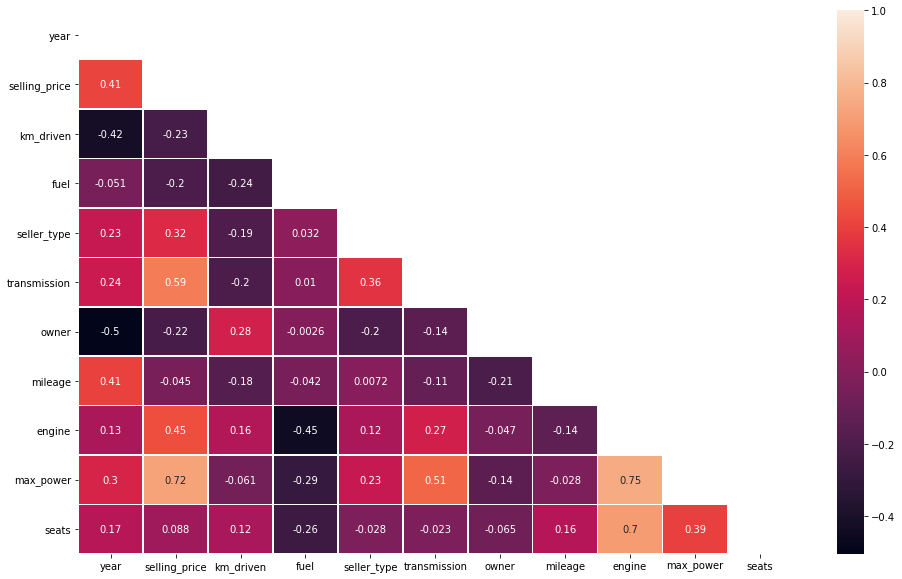

In [48]:
fig, ax = plt.subplots(figsize=(16,10))

matrix = np.triu(dataframe2.corr())
sns.heatmap(dataframe2.corr(), annot=True, fmt='.2g', linewidths=.5, mask=matrix, ax=ax)

#### Splitting Datasets into Training and Testing .

Now we would need to divide the dataframes into dataframe_x and dataframe_y , where dataframe_x would contain the features on which the model would train , and dataframe_y consists of the result for each row , which model would train against .


Here , we would be using Selling_Price as the result that we want to predict , based on the features of the car .

In [49]:
dataframe1_y = dataframe1['selling_price'].copy()
dataframe1_x = dataframe1.drop(['selling_price'],axis=1)

dataframe2_y = dataframe2['selling_price'].copy()
dataframe2_x = dataframe2.drop(['selling_price'],axis=1)